In [1]:
import glob
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow

In [2]:
def plot_model_history(acc,vacc,loss,vloss):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(acc)+1),acc)
    axs[0].plot(range(1,len(vacc)+1),vacc)
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(acc)+1),len(acc)/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(loss)+1),loss)
    axs[1].plot(range(1,len(vloss)+1),vloss)
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(loss)+1),len(loss)/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [7]:
raw_d = pd.read_csv('/Users/toothless/Downloads/Results/Code model train/TrainValidation_accu_loss_RAW.csv')

In [8]:
raw_d.head()

,Unnamed: 0,raw_acc,raw_vacc,raw_loss,raw_vloss
0,0,0.759343,0.804649,0.550013,0.463787
1,1,0.810926,0.622025,0.433045,2.135820
2,2,0.826151,0.688434,0.398130,1.257261
3,3,0.832057,0.683453,0.384223,2.050640
4,4,0.836117,0.742114,0.372665,1.357906


In [10]:
raw_vacc = list(raw_d['raw_vacc'])
raw_vloss=list(raw_d['raw_vloss'])

In [11]:
surf_d = pd.read_csv('/Users/toothless/Downloads/Results/Code model train/TrainValidation_accu_losss_SURF.csv')

In [12]:
surf_d.head()

,Unnamed: 0,surf_acc,surf_vacc,surfloss,surf_vloss
0,0,0.737012,0.625346,0.593128,0.681562
1,1,0.775491,0.626453,0.498106,0.817181
2,2,0.789056,0.635307,0.476221,1.794016
3,3,0.791917,0.627559,0.465421,1.012068
4,4,0.794408,0.594909,0.454553,0.854717


In [14]:
surf_vacc = list(surf_d['surf_vacc'])
surf_vloss=list(surf_d['surf_vloss'])

In [15]:
lbp_d = pd.read_csv('/Users/toothless/Downloads/Results/Code model train/TrainValidation_accu_loss_lbp.csv')

In [16]:
lbp_d.head()

,Unnamed: 0,lbp_acc,lbp_vacc,lbp_loss,lbp_vloss
0,0,0.734244,0.752629,0.590201,0.540293
1,1,0.768940,0.670725,0.501603,0.845396
2,2,0.770693,0.791920,0.486622,0.454479
3,3,0.778075,0.785833,0.485305,0.492509
4,4,0.784165,0.726065,0.471935,0.560741


In [17]:
lbp_vacc = list(lbp_d['lbp_vacc'])
lbp_vloss=list(lbp_d['lbp_vloss'])

In [18]:
hue_d = pd.read_csv('/Users/toothless/Downloads/Results/Code model train/TrainValidation_accu_loss_huesift.csv')

In [19]:
hue_d.head()

,Unnamed: 0,huesift_acc,huesift_vacc,huesift_loss,huesift_vloss
0,0,0.725385,0.755396,0.615403,0.566402
1,1,0.762849,0.634754,0.510118,0.746052
2,2,0.794408,0.752075,0.460395,0.591535
3,3,0.815355,0.832319,0.421307,0.401968
4,4,0.819230,0.527947,0.407997,1.137656


In [20]:
huesift_vacc = list(hue_d['huesift_vacc'])
huesift_vloss=list(hue_d['huesift_vloss'])

In [21]:
hog_d = pd.read_csv('/Users/toothless/Downloads/Results/Code model train/TrainValidation_accu_loss_hog.csv')

In [22]:
hog_d.head()

,Unnamed: 0,hog_acc,hog_vacc,hog_loss,hog_vloss
0,0,0.733321,0.369673,0.597667,1.583008
1,1,0.757959,0.563365,0.511654,3.067315
2,2,0.768202,0.723298,0.501868,0.584312
3,3,0.769493,0.717764,0.497606,0.617393
4,4,0.770601,0.774211,0.495081,0.567038


In [23]:
hog_vacc = list(hog_d['hog_vacc'])
hog_vloss=list(hog_d['hog_vloss'])

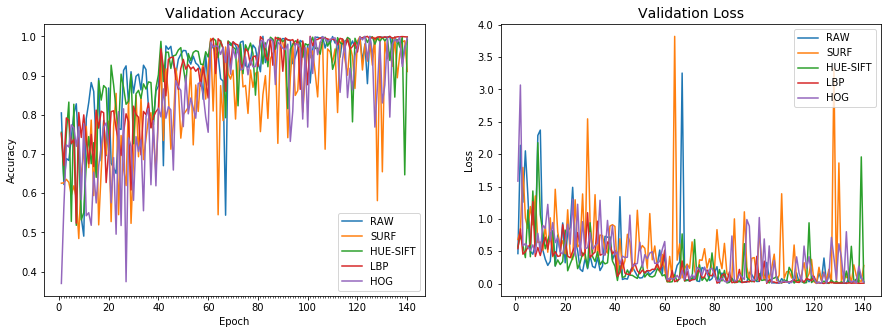

In [37]:
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].plot(range(1,len(raw_vacc)+1),raw_vacc)
axs[0].plot(range(1,len(surf_vacc)+1),surf_vacc)
axs[0].plot(range(1,len(huesift_vacc)+1),huesift_vacc)
axs[0].plot(range(1,len(lbp_vacc)+1),lbp_vacc)
axs[0].plot(range(1,len(hog_vacc)+1),hog_vacc)
axs[0].set_title('Validation Accuracy',fontsize=14)
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_xticks(np.arange(1,len(raw_vacc)+1),len(raw_vacc)/10)
axs[0].legend(['RAW', 'SURF','HUE-SIFT','LBP','HOG'], loc='best')
axs[1].plot(range(1,len(raw_vloss)+1),raw_vloss)
axs[1].plot(range(1,len(surf_vloss)+1),surf_vloss)
axs[1].plot(range(1,len(huesift_vloss)+1),huesift_vloss)
axs[1].plot(range(1,len(lbp_vloss)+1),lbp_vloss)
axs[1].plot(range(1,len(hog_vloss)+1),hog_vloss)
axs[1].set_title('Validation Loss',fontsize=14)
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_xticks(np.arange(1,len(raw_vloss)+1),len(raw_vloss)/10)
axs[1].legend(['RAW', 'SURF','HUE-SIFT','LBP','HOG'], loc='best')
plt.show()